<a href="https://colab.research.google.com/github/almareshe/Tarea1/blob/main/Ejercicio2_solucionedp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2. Grafica de la solución

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$\frac{\partial u(0,t)}{\partial x}=0,\;  \frac{\partial u(1,t)}{\partial x}=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=f(x),\;\;\;0<x<1$$

$$f(x)= \left\{ \begin{array}{lcc}
             -2 &   si  & 0< x \leq 1/2\\
             \\ 0, &  si & 1/2 < x < 1 \\
             \end{array}
\right.$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=-1-\sum_{n=1}^{\infty}[\frac{4}{nπ}sen\left(\frac{nπ}{2}\right)]cos(nπx)e^{t(-nπ^2)}.$$

In [ ]:
from pylab import *

Graficamos la condición inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
      if 0<=x[i]<=(1/2):
        y[i]=-2
      else:
        y[i]=0
    return y

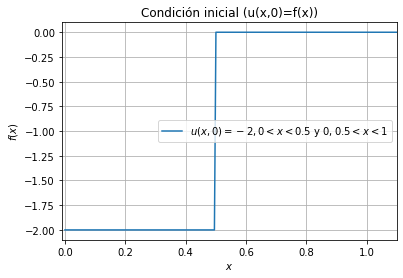

In [ ]:
x = linspace(0,5,1000)
f = recta(x)
plot(x,f, label='$u(x,0)=-2, 0<x<0.5$ y $0, 0.5<x<1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.1]),ylim([-2.1,0.1]),grid(),legend()
show()

Para aproximar la condición inicial $u(x,0)=f(x)$ , usamos una serie de Fourier
$$f(x)= \left\{ \begin{array}{lcc}
             -2 &   si  & 0< x \leq 1/2\\
             \\ 0, &  si & 1/2 < x < 1 \\
             \end{array}
\right.$$

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (4/(n*pi))*(sin((n*pi)/2))*cos(n*pi*x)
    return -1-f

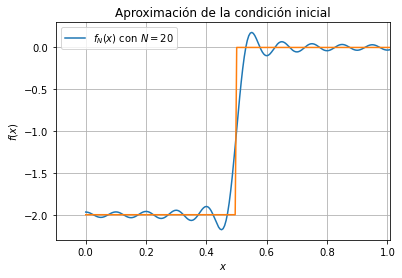

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.01]),ylim([-2.3,0.3]),grid(),legend()
show()

Ahora veamos que podemos visualizar la aproximacion para diferentes cantidades de armónicos.

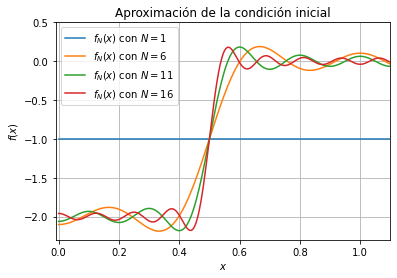

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-2.30,0.5]),grid(),legend()
show()

Agregamos la parte temporal para visualizar la solución completa.


Para el momento inicial, $t=0$ tenemos:

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (4/(n*pi))*(sin((n*pi)/2))*cos(n*pi*x)* exp(-n**2*pi**2*t[i])
    return -1-f

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

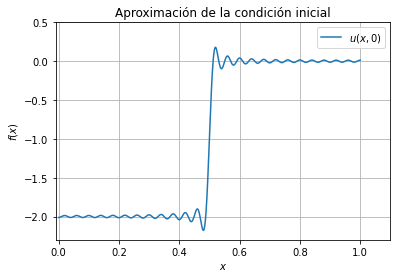

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-2.30,0.5]),grid(),legend()
show()

Ahora para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

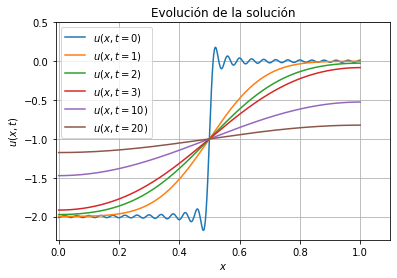

In [ ]:
plot(x,U[:,0],label='$u(x,t=0)$') 
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.1]),ylim([-2.30,0.5]),grid(),legend()
show()

De igual forma podemos verlo en una gráfica 3D

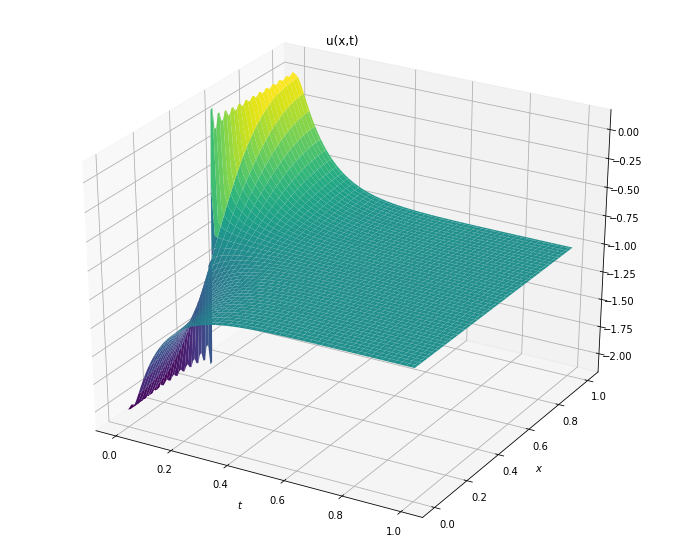

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="viridis");